In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
import pickle as pkl
import seaborn as sns

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [ ]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/
with open("data/regression_generated.csv", 'r') as fin:
    df = pd.read_csv(fin)
display(df)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

ax1.scatter(x=df['features_1'], y=df['features_2'], marker='o', c='r', edgecolor='b')
ax1.set_title('features_1 vs features_2')
ax1.set_xlabel('features_1')
ax1.set_ylabel('features_2')

ax2.scatter(x=df['features_2'], y=df['features_3'], marker='o', c='r', edgecolor='b')
ax2.set_title('features_2 vs features_3')
ax2.set_xlabel('features_2')
ax2.set_ylabel('features_3')

ax3.scatter(x=df['features_1'], y=df['features_3'], marker='o', c='r', edgecolor='b')
ax3.set_title('features_1 vs features_3')
ax3.set_xlabel('features_1')
ax3.set_ylabel('features_3')

print("Basing on the shape, the data do not appear to be correlated")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [ ]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

In [ ]:
mean = [4,0]
stddev = [2,1]
samples = 50

cov_1 = [[stddev[0]**2, 0],
              [0, stddev[0]**2]]

cov_2 = [[stddev[1]**2, 0],
              [0, stddev[1]**2]]

g1 = np.random.multivariate_normal([mean[0], mean[0]], cov_1, size=samples)
g2 = np.random.multivariate_normal([mean[1], mean[1]], cov_2, size=samples)

fig, axis = plt.subplots(figsize=(8,8))
axis.scatter(x=g1[:,0], y=g1[:,1], label="2D Gaussian 1 $\mu_1=4$, $\sigma_1=2$")
axis.scatter(x=g2[:,0], y=g2[:,1], label="2D Gaussian 2 $\mu_2=0$, $\sigma_2=1$")
axis.legend()
axis.set_xlabel("x")
axis.set_ylabel("y")
axis.set_title("Two 2D gaussian distributions")
fig.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


As the distances increase in value, we note a small increase in the value of the residuals too.


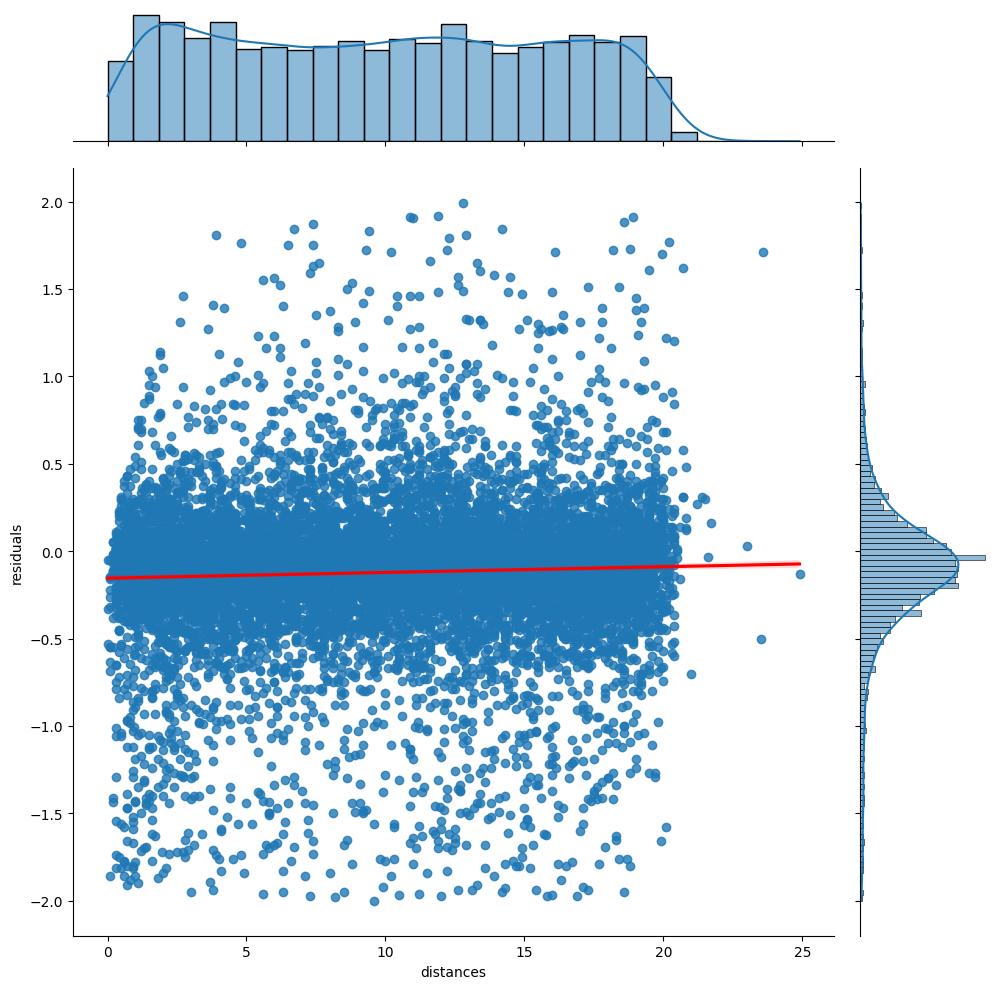

In [184]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
with open("data/residuals_261.pkl", 'rb') as fin:
    dataSet = pkl.load(fin).reshape(1)
residuals = dataSet[0]['residuals']
distances = dataSet[0]['distances']
dataSet = pd.DataFrame.from_dict(dataSet[0])
df = dataSet[abs(dataSet['residuals'])<2]
display(df)
sns.jointplot(data=df, x='distances', y='residuals', kind="reg", height=10, joint_kws={"line_kws":{"color": "r"}})

print("As the distances increase in value, we note a small increase in the value of the residuals too.")


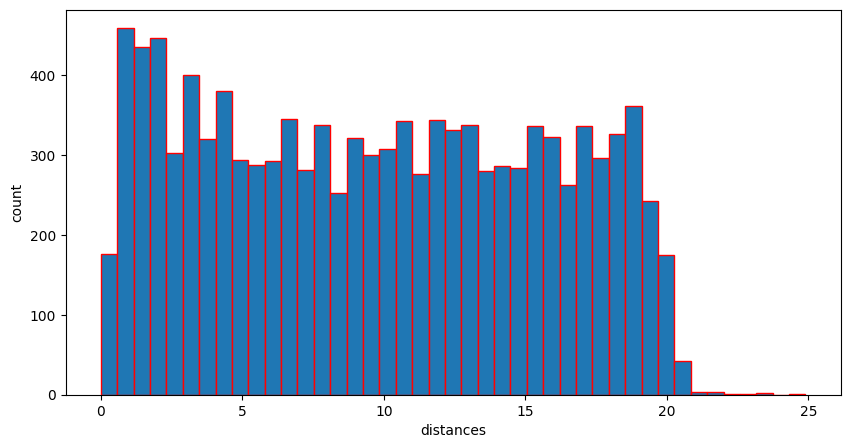

In [195]:
binNumber = 43
fig, axis = plt.subplots(figsize=(10,5))
binsValues, binsEdges, _= axis.hist(distances, bins=binNumber, edgecolor='r')
axis.set_xlabel("distances")
axis.set_ylabel("count")


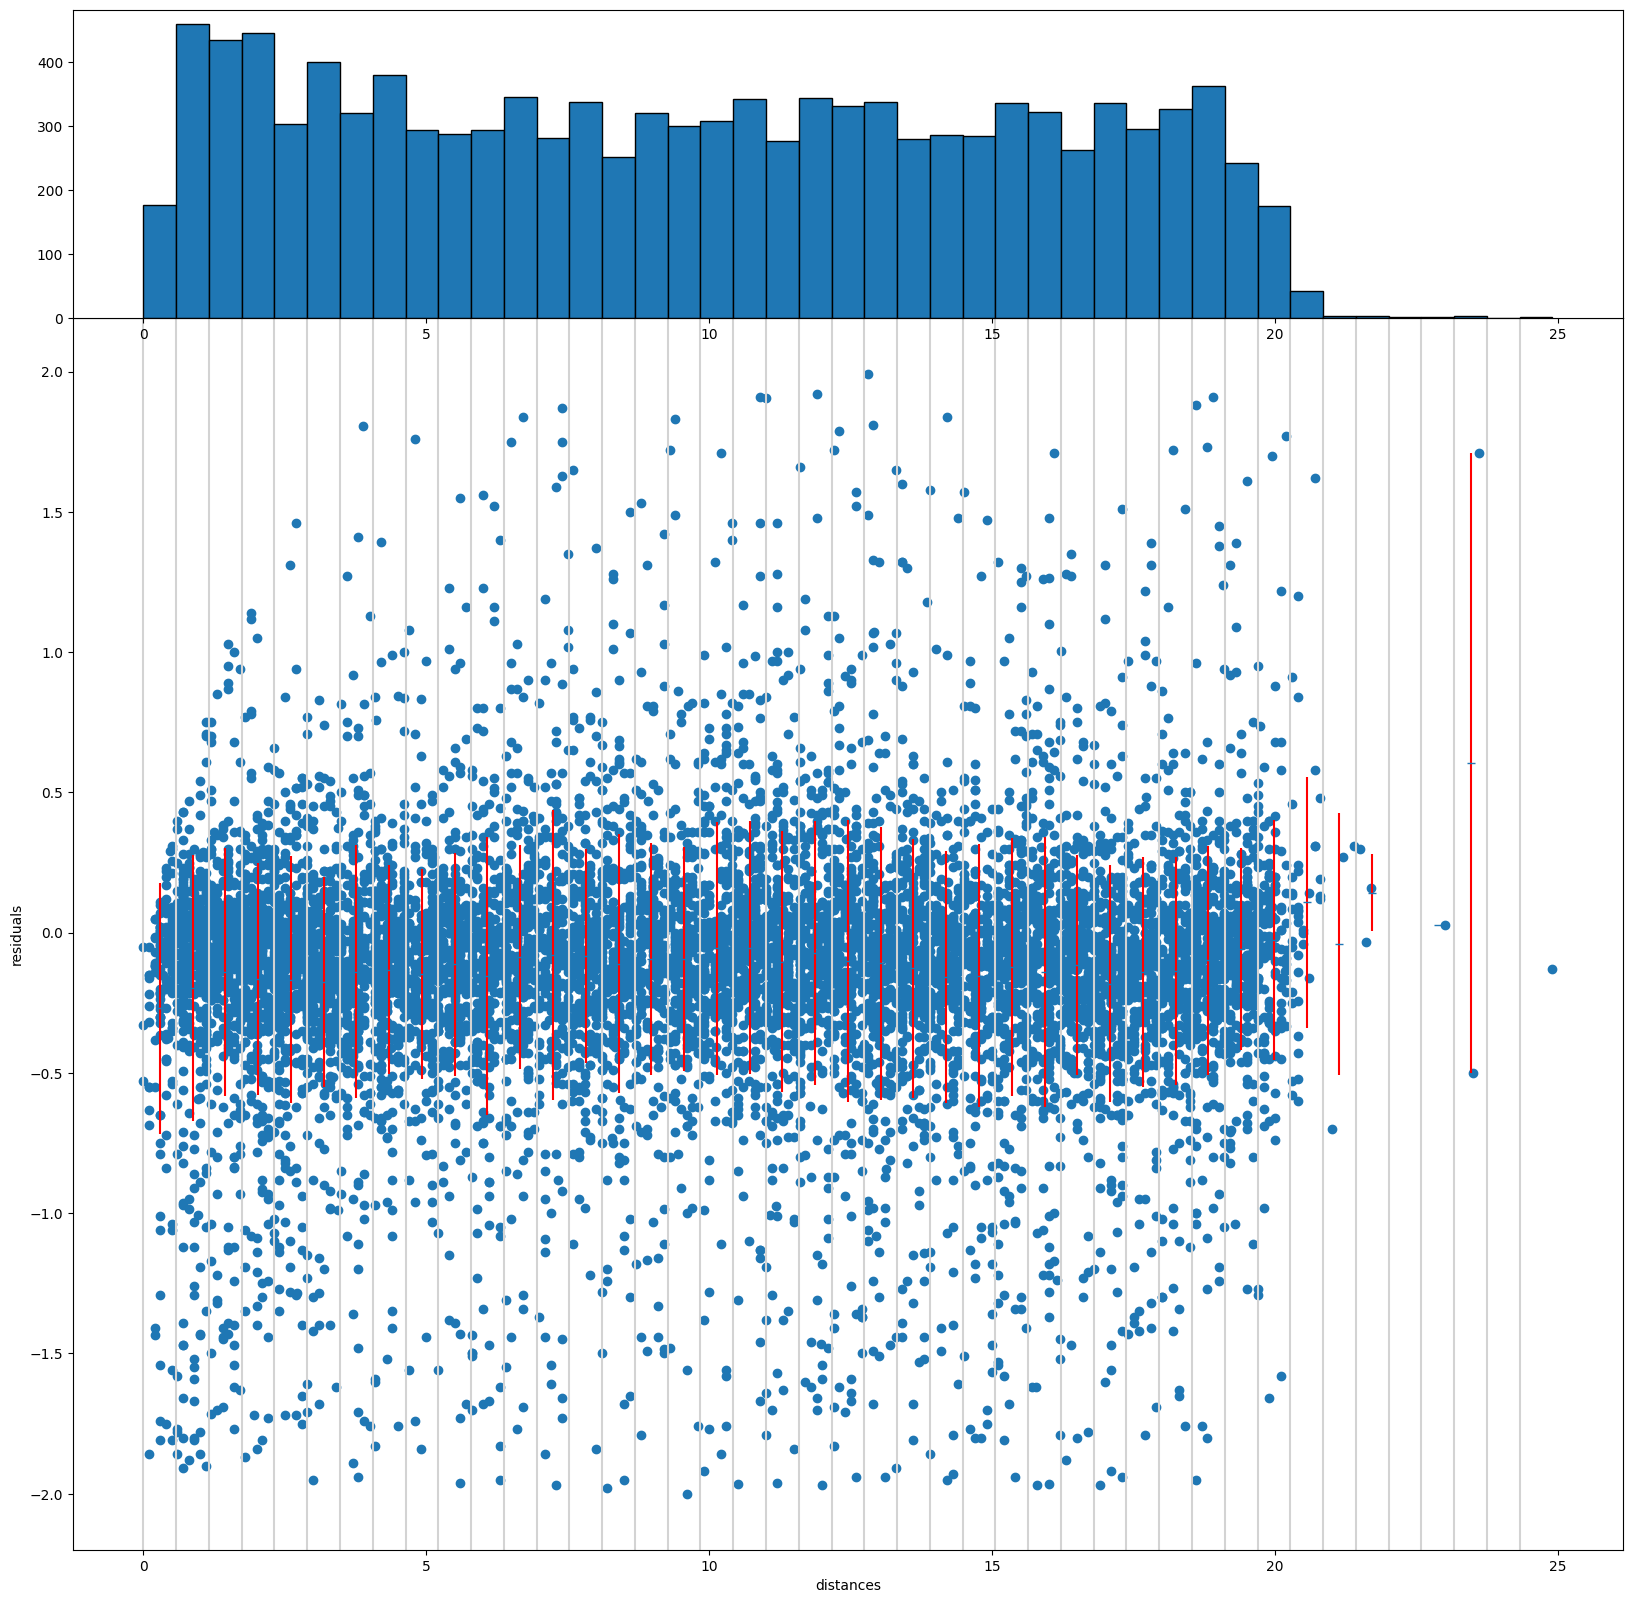

In [215]:
# center of each bin (x)
binCenters = [(binsEdges[x+1] + binsEdges[x])/2 for x in range(binNumber)]

# mean of the residuals in each bin (y)
residualMeans = [(np.mean(df[(binsEdges[x]<=df["distances"]) & (df["distances"]< binsEdges[x+1])]["residuals"].to_numpy())) for x in range(binNumber)]
# standard deviation (err_y)
stddevs = [(np.std(df[(binsEdges[x]<=df["distances"])&(df["distances"]<binsEdges[x+1])]["residuals"].to_numpy())) for x in range(binNumber)]

fig = plt.figure(figsize=(20,20))
grid=fig.add_gridspec(2,1,hspace=0, height_ratios=(1,4))
ax_scatter = fig.add_subplot(grid[1])
ax_hist = fig.add_subplot(grid[0], sharex=ax_scatter)

binsValues, binsEdges, _ =ax_hist.hist(distances, bins=binNumber, edgecolor="black")

ax_scatter.errorbar(binCenters, residualMeans, stddevs, fmt="_", ecolor="r")
ax_scatter.scatter(x=df["distances"], y=df["residuals"])
ax_scatter.set_xlabel("distances")
ax_scatter.set_ylabel("residuals")
for x in range(binNumber):
    ax_scatter.axvline(binsEdges[x], color="lightgrey")

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
